https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

In [2]:
pip install xgboost

  Using cached xgboost-1.3.3-py3-none-macosx_10_14_x86_64.macosx_10_15_x86_64.macosx_11_0_x86_64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [4]:
import pandas as pd
import seaborn as sns


dataset = pd.read_csv('BankChurners.csv')

In [5]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
dataset = dataset.rename(
    columns= {
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Long1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Long2'})

In [8]:
dataset.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Long1                       float64
Long2                       float64
dtype: object

2


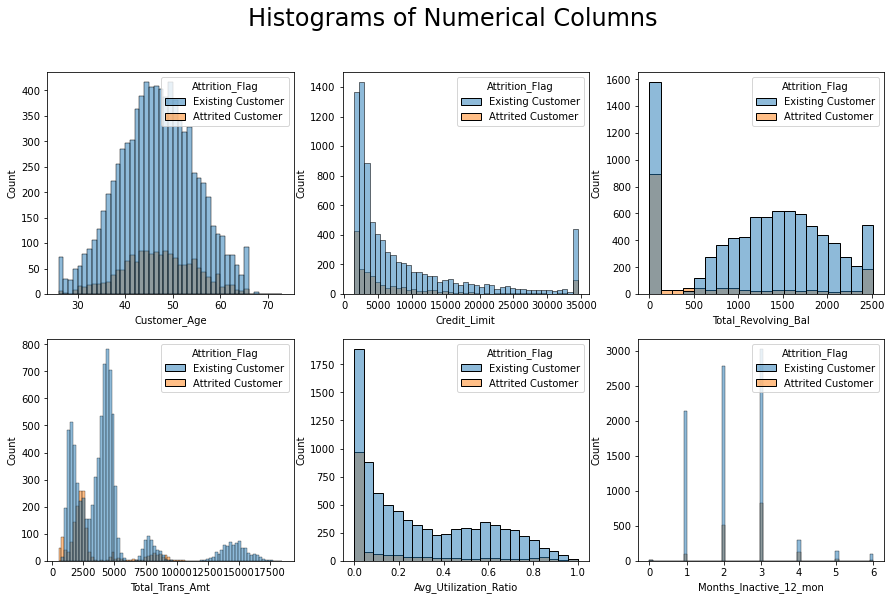

In [9]:
columns = ['Customer_Age', 'Credit_Limit' ,'Total_Revolving_Bal'
           ,'Total_Trans_Amt','Avg_Utilization_Ratio','Months_Inactive_12_mon'
          ]

#columns = ['Customer_Age', 'Credit_Limit' ,'Total_Revolving_Bal'
#           ,'Total_Trans_Amt','Avg_Utilization_Ratio','Months_on_book'
#           ,'Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon'
#          ]


norow = int(round(len(columns)/3,0))
print (norow)

fiq, ax = plt.subplots(norow, 3, figsize=(15,9))


plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")

for i,d in enumerate(columns):
     #print (i,d)
     if i < 3:
         chart = sns.histplot(x=dataset.loc[:,d], data=dataset, ax=ax[0,i], hue='Attrition_Flag')
     else:
         chart = sns.histplot(x=dataset.loc[:,d], data=dataset, ax=ax[1,i-6], hue='Attrition_Flag')   
        
        #chart.set(title='Tips Bar Plot Default (Avg)')

# Exploratory Data Analysis Numerical Columns

From the above numerical data visualisation, we can see the following observation about the customers :
    * Average age of the customers is 46 years old.
    * Max credit limit is up to $35k though 75% of customers have credit limit less than $11k.
    * Most customers have zero revolving balance at the end of billing cycle.
    * Those customers who have revolving balances, the average is about $1.5k.  
    * Average transaction amounts is $4.4k where about 75% of customers falling within this boundary.
    * The average utilisation of credit limit is about 0.27%. 
    * Most customers stay with the bank for about 36 weeks.
    

Further note :
It's very obvious from total revolving balance, the one with zero balance is basically the one without activity and hence attrition rate is high. But at the same time, you also higher attrition for those customers with revolving balance of 2500. Need to find a bit more on this. 



       

In [10]:
dataset['Revolving_Flag'] = 'Normal'
dataset.loc[:,'Revolving_Flag']

dataset.loc[(dataset.Total_Revolving_Bal > 2400),'Revolving_Flag']='High Attrition'
dataset.loc[(dataset.Total_Revolving_Bal == 0),'Revolving_Flag']='High Attrition'

Further questions to ask regarding the attrition :
    * Those customers who have zero revolving balances, do they actually use their cards or they are being discipline?
    * What are the profiles for those customers who have revolving balances? Are they the ones who left the bank?
    * Is there any link between avg utilisation ratio and attrition rate?
    * Can we also see from total transaction amounts if we can determine which customers will leave the bank?
    

In [11]:
dataset.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Long1                       float64
Long2                       float64
Revolving_Flag               object
dtype: object

# Exploratory Data Analysis Categorical Columns

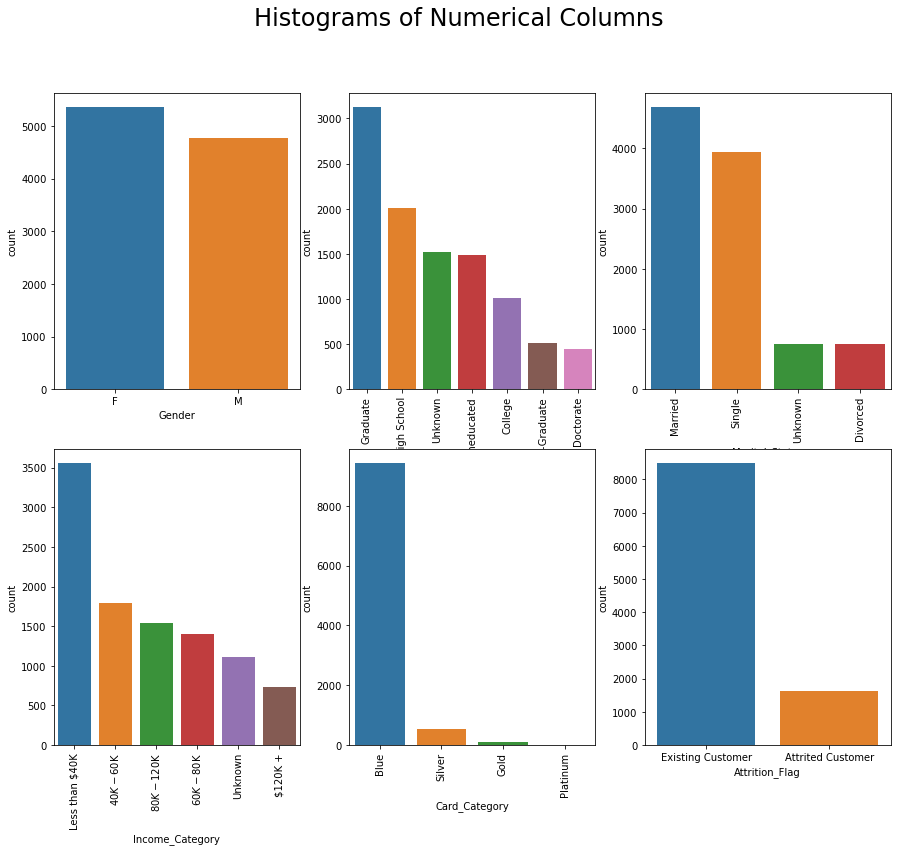

In [12]:
columns = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category','Attrition_Flag']


norow = int(round(len(columns)/3,0))

fiq, ax = plt.subplots(norow, 3, figsize=(15,12))


plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")

for i,d in enumerate(columns):
     #print (i,d)
     if i < 3:
         chart = sns.countplot(x=dataset.loc[:,d], data=dataset, order = dataset.loc[:,d].value_counts().index, ax=ax[0,i])
         
         if dataset.loc[:,d].nunique() > 3: 
             chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  

     else:
         chart = sns.countplot(x=dataset.loc[:,d], data=dataset, order = dataset.loc[:,d].value_counts().index, ax=ax[1,i-6])
         if dataset.loc[:,d].nunique() > 3: 
             chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
            
        
        #chart.set(title='Tips Bar Plot Default (Avg)')

# Exploratory Data Analysis Categorical Columns

We can see further information about the customers from the categorical columns.
    * Based on gender, we have almost equal split between males and females
    * Based on education, we can also see we have significant customers with graduate degrees
    * Marital status is also closely split between single and married
    * Another interest fact, we have significant customers with salary less than $40k
    * We have 4 product categories but majority of customers signed up with Blue
    * The actual customer that moved out is 1627 customers out 8500 existing customers (16%)
    
We are going to look at further the profiles of these attrited customers and see if we can see a pattern in both numerical and categorical columns.




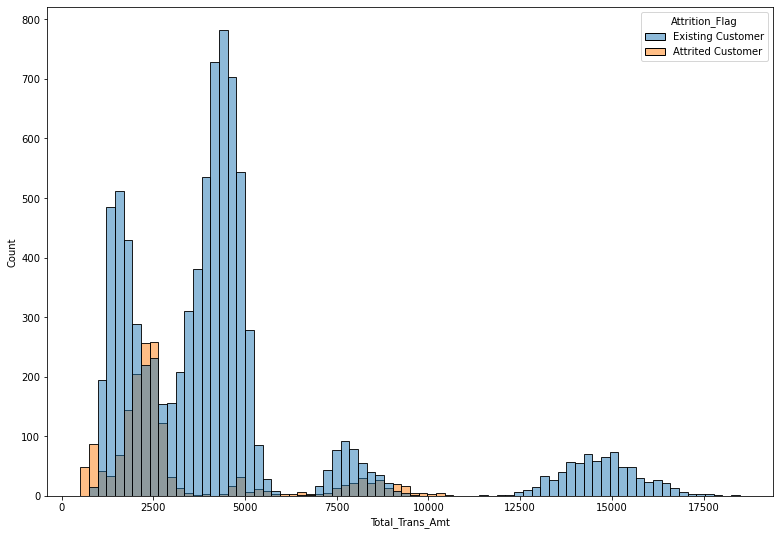

In [25]:
plt.subplots(figsize=(13,9))
sns.histplot(x=dataset['Total_Trans_Amt'], data=dataset, hue='Attrition_Flag')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots()
sns.histplot(x=dataset['Total_Revolving_Bal'], data=dataset, hue='Total_Trans_Amt')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x7f9788808e50> (for post_execute):


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py", line 41, in show
    display(
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "<decorator-gen-9>", line 2, in __call__
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py", line 224, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/formatters.py", line 341, in __call__
    return printer(obj)
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py", line 248, in <lambda>
    png_formatter.for_type(Figure, lambda fig: print_figure(fig, 'png', **kwargs))
  File "/opt/anaconda3/lib/python3.8/site-

Attrition occurs in those customers with total transactions less than $12.5k with customers spending more than than remain with the bank.

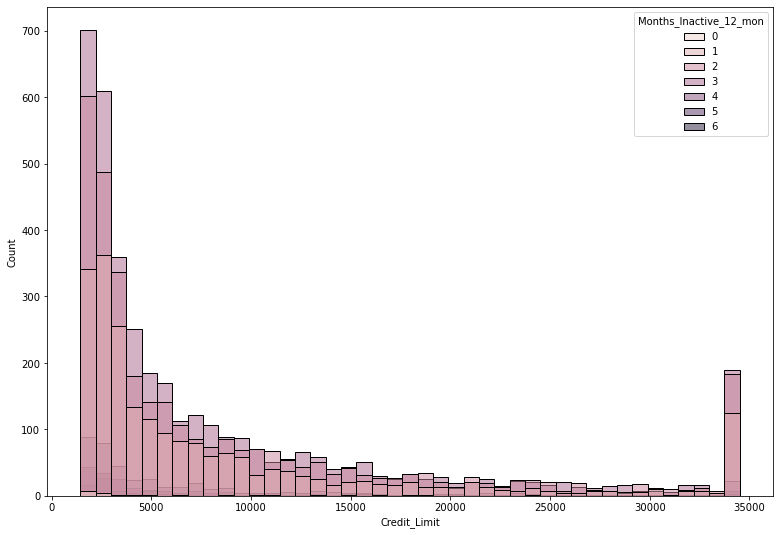

In [15]:
plt.subplots(figsize=(13,9))
sns.histplot(x=dataset['Credit_Limit'], data=dataset, hue='Months_Inactive_12_mon')


We can observe as well that customers who have been inactive especially for 3 months have the most attrition rate. 
More needs to be done to follow up and monitor customer activity to prevent them from leaving. 

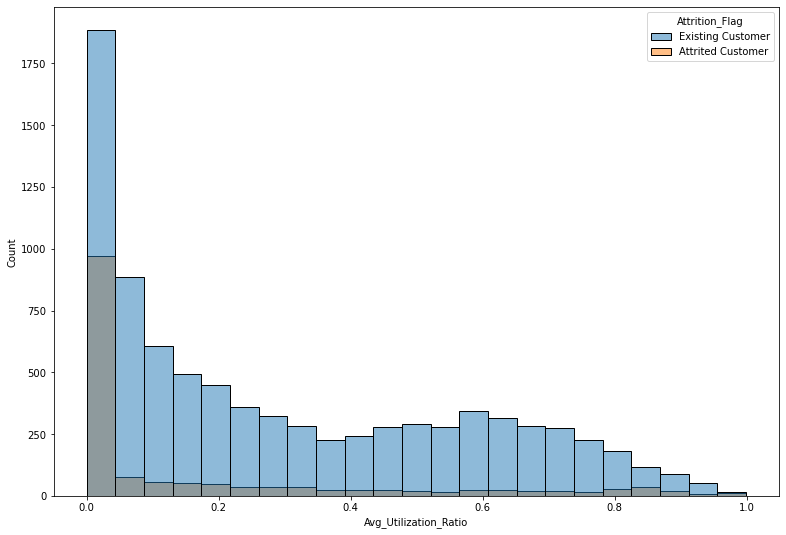

In [16]:
plt.subplots(figsize=(13,9))
sns.histplot(x=dataset['Avg_Utilization_Ratio'], data=dataset, hue='Attrition_Flag')

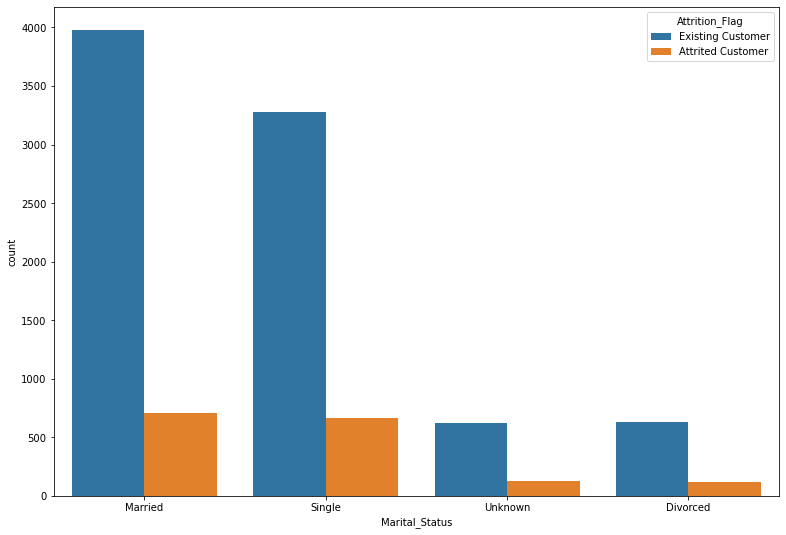

In [17]:

# looks like single people tend to have higher attrition

yourval = 'Marital_Status'
plt.subplots(figsize=(13,9))
sns.countplot(x=dataset[yourval], data=dataset, hue='Attrition_Flag',order = dataset[yourval].value_counts().index)

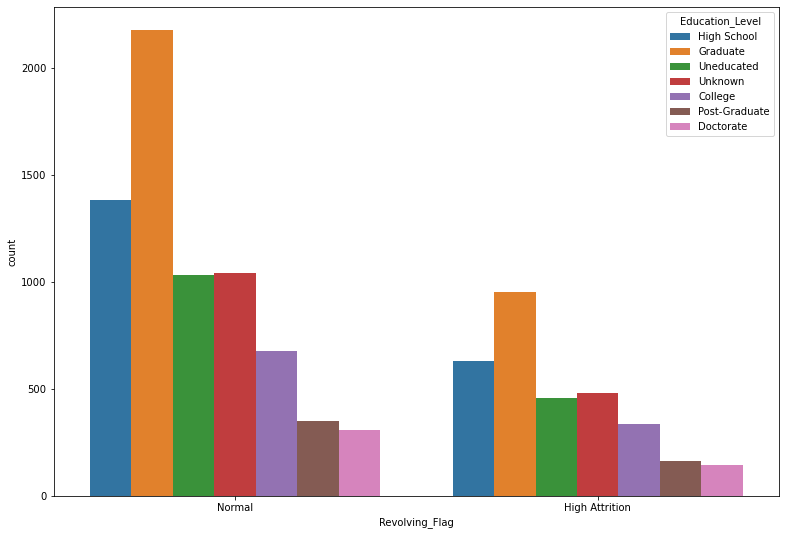

In [18]:
yourval = 'Revolving_Flag'
plt.subplots(figsize=(13,9))
sns.countplot(x=dataset[yourval], data=dataset, hue='Education_Level',order = dataset[yourval].value_counts().index)

In [19]:
dataset.groupby('Revolving_Flag')['Education_Level'].value_counts(normalize=True)

Revolving_Flag  Education_Level
High Attrition  Graduate           0.300759
                High School        0.199241
                Unknown            0.151486
                Uneducated         0.144213
                College            0.106262
                Post-Graduate      0.052182
                Doctorate          0.045857
Normal          Graduate           0.312563
                High School        0.198564
                Unknown            0.149318
                Uneducated         0.148026
                College            0.097200
                Post-Graduate      0.050395
                Doctorate          0.043934
Name: Education_Level, dtype: float64

In [20]:
dataset.groupby('Revolving_Flag')['Marital_Status'].value_counts(normalize=True)

Revolving_Flag  Marital_Status
High Attrition  Married           0.444023
                Single            0.402277
                Unknown           0.077799
                Divorced          0.075901
Normal          Married           0.471357
                Single            0.383489
                Divorced          0.072936
                Unknown           0.072218
Name: Marital_Status, dtype: float64

In [21]:
dataset.groupby('Revolving_Flag')['Income_Category'].value_counts(normalize=True)

Revolving_Flag  Income_Category
High Attrition  Less than $40K     0.370019
                $40K - $60K        0.164769
                $80K - $120K       0.143896
                $60K - $80K        0.135674
                Unknown            0.117015
                $120K +            0.068627
Normal          Less than $40K     0.343288
                $40K - $60K        0.182197
                $80K - $120K       0.155061
                $60K - $80K        0.139698
                Unknown            0.106533
                $120K +            0.073223
Name: Income_Category, dtype: float64

In [22]:
dataset.groupby('Revolving_Flag')['Gender'].value_counts(normalize=True)

Revolving_Flag  Gender
High Attrition  F         0.556926
                M         0.443074
Normal          F         0.516439
                M         0.483561
Name: Gender, dtype: float64

Finding when splitting revolving flag by different categories :

 * Not much different by education level
 * Married people have higher attrition rate by ~3%
 * Female also tends to have higher attrition rate by ~4%

In [23]:
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object

SyntaxError: invalid syntax (<ipython-input-23-884435a2d984>, line 1)

In [ ]:
df_test.groupby(['A'])['B'].value_counts(normalize=True)

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



# just use pie chart to do further analysis to compare attrition vs retaining customers


In [ ]:
dataset.groupby('Education_Level',as_index=False).count()['CLIENTNUM']

In [ ]:
dataset.dtypes

In [ ]:
a = dataset[['Gender','Customer_Age']].groupby('Gender',as_index=False).count()
total = dataset['Gender'].count()

In [ ]:
a['Total'] = total
a['Pctg'] = a['Customer_Age']/a['Total']
a

Attrition rate higher in those customers who harly use the card

In [ ]:
dataset.dtypes

In [ ]:
dataset['Months_on_book'].describe()


In [ ]:
df['Gender'].unique()

In [ ]:
df['Gender'].nunique()

In [ ]:
dataset["Attrition_Flag"].value_counts()

In [ ]:
dataset.dtypes


In [ ]:
dataset2 = dataset[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                   'Months_Inactive_12_mon']]
#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [ ]:
print (dataset.isna().any())

print (dataset.isna().sum())

In [ ]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique  values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

In [ ]:
dataset.info()

In [ ]:
df[['Customer_Age','Credit_Limit']].describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create fig and subplots
fig, ax = plt.subplots(1,3,figsize=(20,8))
     
chart1 = sns.countplot(ax=ax[0],data=df,x='Dependent_count',order = df['Dependent_count'].value_counts().index)     
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)  

chart2 = sns.countplot(ax=ax[1],data=df,x='Education_Level',order = df['Education_Level'].value_counts().index)  
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)  

chart3 = sns.countplot(ax=ax[2],data=df,x='Marital_Status',order = df['Marital_Status'].value_counts().index)    
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=90)  


plt.show()

In [ ]:
# create fig and subplots
fig, ax = plt.subplots(1,3,figsize=(20,8))
     

sns.countplot(ax=ax[0],data=df,x='Dependent_count',hue='Attrition_Flag',order = df['Dependent_count'].value_counts().index)     
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)  

chart2 = sns.countplot(ax=ax[1],data=df,x='Education_Level',hue='Attrition_Flag',order = df['Education_Level'].value_counts().index)  
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)  

chart3 = sns.countplot(ax=ax[2],data=df,x='Marital_Status',hue='Attrition_Flag',order = df['Marital_Status'].value_counts().index)    
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=90)  

plt.show()

In [ ]:
chart2 = sns.countplot(data=df,x='Income_Category',hue = 'Attrition_Flag', order = df['Income_Category'].value_counts().index)  
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)  

plt.show()

In [ ]:
#penguins = sns.load_dataset("penguins")
plt.subplots(figsize=(20, 10))
sns.histplot(data=df, x="Credit_Limit",hue='Card_Category')

plt.show()

**What is the main issue?**

The main issue is to figure out what type of customers deciding to churn out and what type of products impacted by these customers. Based on this finding, we can determine if we have issues with our products offering and if we have to change our strategy.


